In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/CHANDRU/Desktop/DS/sample_sales - new.csv")

In [3]:
train.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [4]:
train.dtypes

account number      int64
name               object
sku                object
category           object
quantity            int64
unit price        float64
ext price         float64
date               object
dtype: object

In [5]:
train.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


In [6]:
train.shape

(1000, 8)

In [7]:
train.isnull().sum()

account number    0
name              0
sku               0
category          0
quantity          0
unit price        0
ext price         0
date              0
dtype: int64

In [8]:
train.corr

<bound method DataFrame.corr of      account number                           name       sku category  \
0            296809                    Carroll PLC  QN-82852     Belt   
1             98022              Heidenreich-Bosco  MJ-21460    Shoes   
2            563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt   
3             93356                  Waters-Walker  AS-93055    Shirt   
4            659366                  Waelchi-Fahey  AS-93055    Shirt   
..              ...                            ...       ...      ...   
995          758133      Kihn, McClure and Denesik  WJ-02096     Belt   
996          850140                      Kunze Inc  GS-86623    Shoes   
997           93356                  Waters-Walker  GS-86623    Shoes   
998          304860                      Huel-Haag  LL-46261    Shoes   
999           98022              Heidenreich-Bosco  LW-86841    Shoes   

     quantity  unit price  ext price                 date  
0          13       44.48     5

In [9]:
train['category'].value_counts(dropna=False)

Shirt    404
Shoes    400
Belt     196
Name: category, dtype: int64

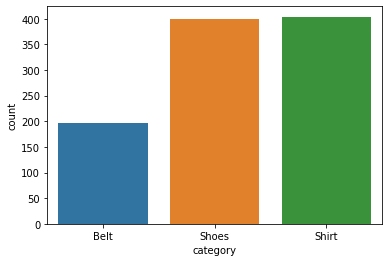

In [10]:
sns.countplot(x='category',data=train)

In [11]:
train['sku'].value_counts(dropna=False)

QN-82852    109
AS-93055    107
KV-99194    106
LW-86841    101
LL-46261    101
VG-32047    100
MJ-21460    100
GS-86623     98
FK-71853     91
WJ-02096     87
Name: sku, dtype: int64

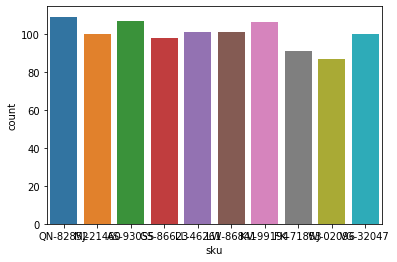

In [12]:
sns.countplot(x='sku',data=train)

In [13]:
train.columns

Index(['account number', 'name', 'sku', 'category', 'quantity', 'unit price',
       'ext price', 'date'],
      dtype='object')

In [14]:
train['category'].replace({'Belt': 0, 'Shirt': 1, 'Shoes': 2},inplace = True) 
train['sku'].replace({'QN-82852': 0, 'AS-93055': 1, 'KV-99194': 2, 'LW-86841':3,'LL-46261':4, 'MJ-21460': 5, 'VG-32047': 6,'GS-86623': 7 ,'FK-71853': 8,'WJ-02096': 9},inplace = True) 

In [15]:
train.dtypes

account number      int64
name               object
sku                 int64
category            int64
quantity            int64
unit price        float64
ext price         float64
date               object
dtype: object

In [16]:
train1 = train.drop('date',axis=1)

In [17]:
train1.dtypes

account number      int64
name               object
sku                 int64
category            int64
quantity            int64
unit price        float64
ext price         float64
dtype: object

In [18]:
train2 = train1.drop('name',axis=1)

In [19]:
train2.dtypes

account number      int64
sku                 int64
category            int64
quantity            int64
unit price        float64
ext price         float64
dtype: object

In [20]:
X = train2.drop("category", inplace=False, axis=1)
y = train2["category"]
print(y.shape)
print(X.shape)

(1000,)
(1000, 5)


In [21]:
X.columns

Index(['account number', 'sku', 'quantity', 'unit price', 'ext price'], dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [23]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracy.mean()

0.8293333333333335

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2  0]
 [ 1 67 30]
 [ 0  9 91]]


In [28]:
from sklearn.metrics import accuracy_score 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.832
